# Begining of Basic Image Processing

In [140]:
:dep anyhow = "1.0.66"
:dep opencv = "0.70.0"
:dep cv-convert = { version = "0.21.2", features=["opencv_0-70", "image_0-23", "nalgebra_0-31", "ndarray_0-15"] }
:dep image = "0.23"
:dep evcxr_image = "1.1.0"
:dep ndarray = "0.15.6"
:dep nalgebra = "0.31.2"
:dep plotters = { version = "^0.3.0", default_features = false, features = ["evcxr", "all_series"] }
extern crate plotters;

use std::fs;
use std::path::{Path};
use anyhow::{anyhow, Result, Error};
use opencv::prelude::*;
use cv_convert::{FromCv, IntoCv, TryFromCv, TryIntoCv};
use image::{ImageBuffer, RgbImage, Rgb};
use evcxr_image::ImageDisplay;
use plotters::prelude::*;

#[macro_use]
extern crate nalgebra as na;

fn opencv_imshow(img: Mat) {
    let img_rgb = RgbImage::new(img.cols() as u32, img.rows() as u32);
    let data: Vec<u8> = img.data_bytes().unwrap().to_owned();
    let channels: u32 = img.channels() as u32;
    image::ImageBuffer::from_fn(img_rgb.width(), img_rgb.height(), | x, y | {
        let yi = y * img_rgb.width();
        let i: usize = ((x + yi) * channels) as usize;
        match channels {
            3 => {
                let b = data[i];
                let g = data[i + 1];
                let r = data[i + 2];
                image::Rgb([r, g, b])
            },
            2 => {
                let b = data[i];
                let g = data[i + 1];
                image::Rgb([0, g, b])
            },
            _ => {
                let b = data[i];
                image::Rgb([b, b, b])
            }
        }
    }).evcxr_display()
}

let image_dir = "/home/cloud-user/workspace/KU15627-Computer-Vision/images";

The type of the variable img_thresh was redefined, so was lost.
The type of the variable img_lab_a_bin was redefined, so was lost.
The type of the variable channels was redefined, so was lost.
The type of the variable img was redefined, so was lost.
The type of the variable img_lab_a was redefined, so was lost.
The type of the variable channels_lab was redefined, so was lost.
The type of the variable img_lab was redefined, so was lost.
The type of the variable dest was redefined, so was lost.
The type of the variable out was redefined, so was lost.


In [141]:
for file in fs::read_dir(image_dir)?.filter_map(|file| file.ok()) {
    println!("{}", file.path().to_path_buf().file_name().unwrap().to_str().unwrap());
  }

Airplane.bmp
Balloon.bmp
Sailboat.bmp
Earth.bmp
Aerial.bmp
Parrots.bmp
Pepper.bmp
Lenna.bmp
Mandrill.bmp
Girl.bmp
couple.bmp
milkdrop.bmp


()

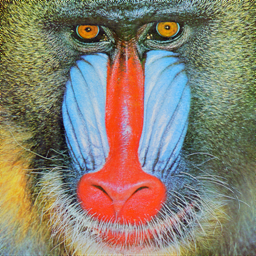

In [142]:
let image_path = Path::new(image_dir).join("Mandrill.bmp");
let img: Mat = opencv::imgcodecs::imread(image_path.to_str().unwrap(), opencv::imgcodecs::IMREAD_UNCHANGED)?;
opencv_imshow(img.clone().to_owned())

In [143]:
println!("height: {}", img.cols());
println!("width: {}", img.rows());
println!("channels: {}", img.channels());

height: 256
width: 256


channels: 3


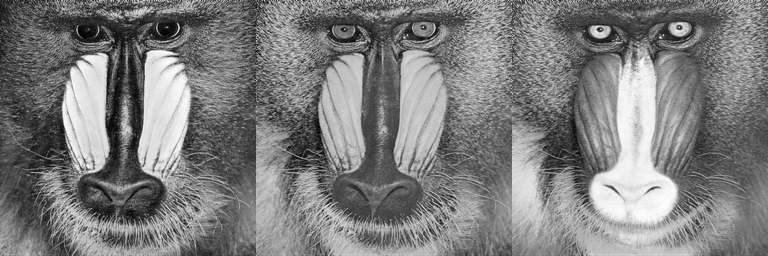

In [144]:
let mut channels: opencv::core::Vector<Mat> = opencv::types::VectorOfMat::new();
opencv::core::split(&img, &mut channels);

let mut dest: Mat = Default::default();
opencv::core::hconcat(&channels, &mut dest).expect("error on concat");
opencv_imshow(dest.clone().to_owned())

In [145]:
fn color_hist(img: Mat) {
    evcxr_figure((480, 320), |root| {
        root.fill(&WHITE)?;
        let mut chart = ChartBuilder::on(&root)
            .caption("Histogram", ("Arial", 20).into_font())
            .margin(5)
            .x_label_area_size(30)
            .y_label_area_size(30)
            .build_cartesian_2d(0..256, -30..610)?;
        chart.configure_mesh().draw()?;
        let color = vec!("b", "g", "r");
        for (i, col) in color.iter().enumerate() {
            // in python, you can just execute
            // histr = cv2.calcHist([img],[i],None,[256],[0,256])
            // the first argument is 
            // the second argument is
            // and the third argument is mask ~ in Rust, you cannot input null value like None in python. so, we use Mat::default()? as None.
            let mut hist = Mat::default();
            opencv::imgproc::calc_hist(
                &opencv::types::VectorOfMat::from(vec![img.clone()]),
                &opencv::types::VectorOfi32::from(vec![i as i32]),
                &Mat::default(),
                &mut hist,
                &opencv::types::VectorOfi32::from(vec![256]),
                &opencv::types::VectorOff32::from(vec![0., 256.]),
                false
            ).expect("calc histogram failed.");
            // TODO: Draw histogram 
            // https://docs.opencv.org/4.6.0/d8/dbc/tutorial_histogram_calculation.html
        }
        Ok(())
    }).evcxr_display()
}

color_hist(img.clone().to_owned())

()

# Different Brightness / Contrast

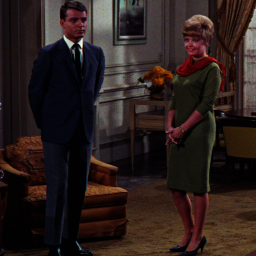

In [118]:
let image_path = Path::new(image_dir).join("couple.bmp");
let img: Mat = opencv::imgcodecs::imread(image_path.to_str().unwrap(), opencv::imgcodecs::IMREAD_UNCHANGED)?;
opencv_imshow(img.clone().to_owned())

In [94]:
color_hist(img.clone().to_owned())

()

# Normalize Brightness

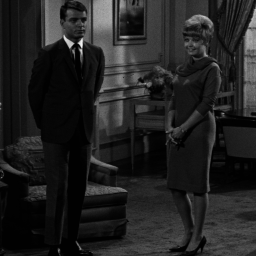

In [96]:
let mut dest: Mat = Default::default();
opencv::imgproc::cvt_color(&img, &mut dest, opencv::imgproc::COLOR_BGR2GRAY, 0).expect("error on cvt_color");
opencv_imshow(dest.clone().to_owned())

In [ ]:
fn gray_hist(img: Mat) {
    evcxr_figure((480, 320), |root| {
        root.fill(&WHITE)?;
        let mut chart = ChartBuilder::on(&root)
            .caption("Histogram", ("Arial", 20).into_font())
            .margin(5)
            .x_label_area_size(30)
            .y_label_area_size(30)
            .build_cartesian_2d(0..256, -30..610)?;
        chart.configure_mesh().draw()?;
        let color = vec!("b", "g", "r");
        for (i, col) in color.iter().enumerate() {
            // in python, you can just execute
            // histr = cv2.calcHist([img],[i],None,[256],[0,256])
            // the first argument is 
            // the second argument is
            // and the third argument is mask ~ in Rust, you cannot input null value like None in python. so, we use Mat::default()? as None.
            let mut hist = Mat::default();
            opencv::imgproc::calc_hist(
                &opencv::types::VectorOfMat::from(vec![img.clone()]),
                &opencv::types::VectorOfi32::from(vec![i as i32]),
                &Mat::default(),
                &mut hist,
                &opencv::types::VectorOfi32::from(vec![256]),
                &opencv::types::VectorOff32::from(vec![0., 256.]),
                false
            ).expect("calc histogram failed.");
            // TODO: Draw histogram 
            // https://docs.opencv.org/4.6.0/d8/dbc/tutorial_histogram_calculation.html
        }
        Ok(())
    }).evcxr_display()
}

gray_hist(img.clone().to_owned())

In [ ]:
// TODO: average, std result of img_gray.faltten()

In [ ]:
// TODO: rewrite imgGrayMod = np.clip(127 + (imgGray.astype(np.float)-ave)/(3.0*std) * 127, 0, 255).astype(np.uint8)

# Binarization

# Morphology Operation

# Contour Extraction

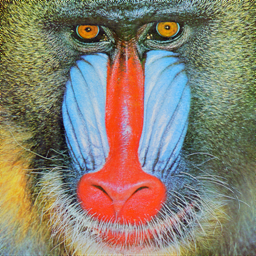

In [146]:
let image_path = Path::new(image_dir).join("Mandrill.bmp");
let img: Mat = opencv::imgcodecs::imread(image_path.to_str().unwrap(), opencv::imgcodecs::IMREAD_UNCHANGED)?;
opencv_imshow(img.clone().to_owned())

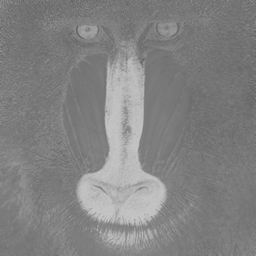

In [147]:
let mut img_lab: Mat = Default::default();
opencv::imgproc::cvt_color(&img, &mut img_lab, opencv::imgproc::COLOR_BGR2Lab, 0).expect("error on cvt_color");

let mut channels_lab: opencv::core::Vector<Mat> = opencv::types::VectorOfMat::new();
// split to Vector<L*A*B channels>.
opencv::core::split(&img_lab, &mut channels_lab).expect("error on split.");
let img_lab_a: Mat = channels_lab.get(1)?.clone().to_owned();
opencv_imshow(img_lab_a.clone().to_owned())

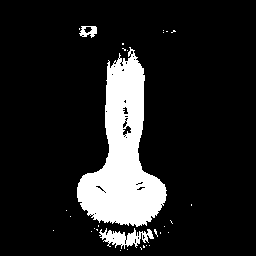

In [148]:
let mut img_lab_a_bin: Mat = Default::default();

let _ = opencv::imgproc::threshold(
    &img_lab_a,
    &mut img_lab_a_bin,
    0., 255., opencv::imgproc::THRESH_BINARY+opencv::imgproc::THRESH_OTSU);
opencv_imshow(img_lab_a_bin.clone().to_owned())

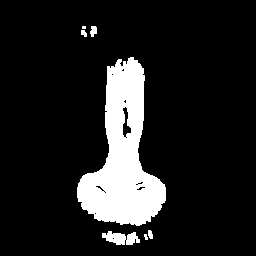

In [164]:
let mut img_erode: Mat = Default::default();
opencv::imgproc::erode(
    &img_lab_a_bin,
    &mut img_erode,
    &Mat::ones(3, 3, opencv::core::CV_8UC1)?.to_mat()?,
    opencv::core::Point::new(-1, -1),
    1, 0, Default::default());
    
let mut img_dilate: Mat = Default::default();
opencv::imgproc::dilate(
    &img_erode,
    &mut img_dilate,
    &Mat::ones(3, 3, opencv::core::CV_8UC1)?.to_mat()?,
    opencv::core::Point::new(-1, -1),
    1, 0, Default::default()
);
opencv_imshow(img_dilate.clone().to_owned());

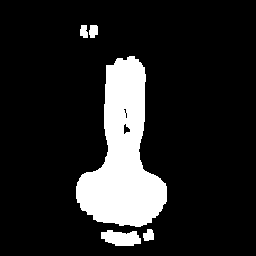

In [165]:
let mut img_erode2: Mat = Default::default();
opencv::imgproc::erode(
    &img_dilate,
    &mut img_erode2,
    &Mat::ones(3, 3, opencv::core::CV_8UC1)?.to_mat()?,
    opencv::core::Point::new(-1, -1),
    2, 0, Default::default());
    
let mut img_dilate2: Mat = Default::default();
opencv::imgproc::dilate(
    &img_erode,
    &mut img_dilate2,
    &Mat::ones(3, 3, opencv::core::CV_8UC1)?.to_mat()?,
    opencv::core::Point::new(-1, -1),
    2, 0, Default::default()
);
opencv_imshow(img_dilate2.clone().to_owned());

In [175]:
let mut contours: opencv::core::Vector<opencv::core::Vector<opencv::core::Point>> = Default::default();
opencv::imgproc::find_contours(
    &mut img_dilate2,
    &mut contours,
    opencv::imgproc::RETR_TREE,
    opencv::imgproc::CHAIN_APPROX_SIMPLE,
    Default::default()
);

let mut contours_area_vector: Vec<f64> = Default::default();
for contour in &contours {
    contours_area_vector.push(opencv::imgproc::contour_area(&contour, false)?);
}
let contours_area_dvector: na::DVector<f64> = na::DVector::from_vec(contours_area_vector);
let max_index = contours_area_dvector.argmax().0 as i32;
println!("{:?}", &max_index);


2


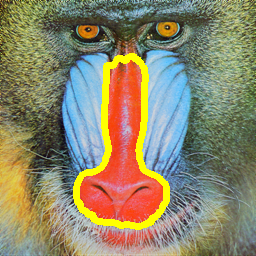

In [187]:
let mut img_contours_result: Mat = img.clone().to_owned();
opencv::imgproc::draw_contours(
    &mut img_contours_result,
    &contours,
    max_index,
    opencv::core::Scalar::new(0.0, 255.0, 255.0, 100.0),
    6,
    0,
    &0.,
    0,
    Default::default()
);
opencv_imshow(img_contours_result.clone().to_owned());

# Filter: Smoothing